In [76]:
#Conda env: base_conda

#Import packages
#---------------------------------------
import sys
from matplotlib import pyplot as plt
import numpy as np
import json
import pandas as pd
import seaborn as sns
import imblearn


#Import your modules
#---------------------------------------
import plaque_f as pf

# Define paths
#----------------------------------------------------------------------
l_code = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
l_data = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
l_fig = '/Users/dominicburrows/Dropbox/PhD/figures/'

s_code = '/cndd3/dburrows/CODE/'
s_data = '/cndd3/dburrows/DATA/'
s_fig = '/cndd3/dburrows/FIGS/'

%load_ext autoreload
sys.version

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:23:11) \n[GCC 9.4.0]'

# Load and pre-process data

In [3]:
#Load data
meta = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/prediction/meta.csv')
cpm = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/prediction/combined_genemat_CPM.csv', index_col=0)
logcpm = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/prediction/combined_genemat_log2p1CPM.csv', index_col=0)
de_genes = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/prediction/adjplq_MAST-LRT_sample-intercept_reduced.csv', index_col=0)


In [4]:
#Ascertain class imbalance
u = np.unique(meta['adj_plq'],return_counts=True)
print(str(np.round(u[1][1]/sum(u[1]) * 100)) + '% of spots are plaque')

16.0% of spots are plaque


In [5]:
def run_(age, dist, long_name, short_name):
    # Declare paths
    data_path = s_data + 'spatial_transcriptomics/plaques/coords/' + age + '/' + long_name + '.json'
    coord_path = '/cndd2/agelber/hal/qc_aligned/' + short_name + '/outs/spatial/tissue_positions.csv'
    genes_path = '/cndd2/agelber/hal/qc_aligned/' + short_name + '/outs/filtered_feature_bc_matrix.h5'
    scale_path = '/cndd2/agelber/hal/qc_aligned/' + short_name + '/outs/spatial/scalefactors_json.json'
    meta = pd.read_csv('/home/AD/agelber/desp1/precast/prec_c25q25g3000/qc_cell_annotation.csv')
    meta_filt = meta[meta['sample'] == short_name]


    spot_df, gene_df = pf.sort_data(data_path, coord_path, genes_path, scale_path, 
                                    meta_filt, min_cell_per_gene=0)#, norm_factor=1e6)
    
    spot_df = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/metadata/' + age + '/' + short_name + '.csv')
    #turn boolean into int
    bool = (spot_df['dist_nearest_plaq'].values < dist).astype(int)
    spot_df['adj_plq'] = bool
    
    #Sanity check
    assert spot_df.shape[0] == gene_df.shape[0] == meta_filt.shape[0]
    assert 'Thy1' not in gene_df.columns.values or 'humanAPP' not in gene_df.columns.values
    print('Number of spots: ' + str(gene_df.shape[0]))
    print('Number of genes: ' + str(gene_df.shape[1]))
    return(spot_df, gene_df)

In [6]:
#OLD ANIMALS
#sort out names
import glob
import os
age = 'old'
os.chdir('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/coords/' + age)
og = glob.glob('*.json')
ID = [i.split('.')[0] for i in og]
sub_ID=[]
for x,i in enumerate(og):
    if x != 1: sub_ID = np.append(sub_ID, i.split('_')[1][:-5])
    else: sub_ID = np.append(sub_ID, i[:-5])
ID, sub_ID



(['V11Y10_030-C',
  '030-B',
  'V11Y17_109-D',
  'V11Y17_109-A',
  'V10S15_040-C',
  'V11Y17_109-C',
  'S29_030-D',
  'V10S15_040-A',
  'V10S15_040-D'],
 array(['030-C', '030-B', '109-D', '109-A', '040-C', '109-C', '030-D',
        '040-A', '040-D'], dtype='<U32'))

In [49]:
#DIST = 150
dist = 150
spot_df, gene_df = run_('old', dist, ID[0], sub_ID[0])

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3397
Number of genes: 32284


In [50]:
spot_df

,Unnamed: 0,barcode,sample,sex,plaque,cluster,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres,micron_x,micron_y,dist_nearest_plaq,dam_scr,adj_plq
0,111351,AAACAAGTATCTCCCA-1_030-C,030-C,F,0,GP/TH,50,102,413,1642,7640.215638,1921.686394,2813.133952,-1.303905,0
1,111352,AAACAATCTACTAGCA-1_030-C,030-C,F,0,CA1,3,43,1049,764,3554.887179,4880.990380,1155.639155,-0.761353,0
2,111353,AAACAGAGCGACTCCT-1_030-C,030-C,F,0,CA3-sp,14,94,500,969,4508.750885,2326.496845,3335.466323,1.198699,0
3,111354,AAACAGTGTTCCTGGG-1_030-C,030-C,F,0,Cortex Layer 2/3,73,43,1046,2073,9645.655919,4867.031399,361.977789,1.716606,0
4,111355,AAACCCGAACGAAATC-1_030-C,030-C,F,0,Amygdala,45,115,273,1548,7202.834232,1270.267277,3555.739719,0.967294,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3392,114743,TTGTTTCACATCCAGG-1_030-C,030-C,F,0,Cortex Layer 5b,58,42,1057,1793,8342.817685,4918.214330,98.155009,0.898491,1
3393,114744,TTGTTTCATTAGTCTA-1_030-C,030-C,F,0,Cortex Layer 2/3,60,30,1186,1830,8514.978452,5518.450516,97.823590,3.975057,1
3394,114745,TTGTTTCCATACAACT-1_030-C,030-C,F,0,Cortex Layer 4,45,27,1219,1550,7212.140219,5671.999308,705.415942,1.810155,0
3395,114746,TTGTTTGTATTACACG-1_030-C,030-C,F,0,Cortex Layer 2/3,73,41,1067,2073,9645.655919,4964.744267,302.444590,-0.445870,0


In [53]:
#Define colormap by clusters
col_df = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/metadata/colors.csv')
sort_clust = col_df['cluster_order'] #all clusters sorted 
sort_col = col_df['color']


In [4]:
#visualise plaque + adjacent spots
for y,name in enumerate(sub_ID):
    spot_df, gene_df = run_('old', dist, ID[y], sub_ID[y])
    clust_lab = spot_df['cluster'].values
    xcoord, ycoord = spot_df['pxl_row_in_fullres'].values, spot_df['pxl_col_in_fullres'].values
    plq_bool = spot_df['plaque'].values == 1
    adj_bool = spot_df['adj_plq'].values == 1


    fig,ax = plt.subplots(figsize=(10,10))
    for x in range(len(sort_clust)): 
        plt.scatter(xcoord[np.where(clust_lab==sort_clust[x])[0]], ycoord[np.where(clust_lab==sort_clust[x])[0]], s=5, label = sort_clust[x], color = sort_col[x], alpha=1)
    plt.scatter(xcoord[plq_bool], ycoord[plq_bool], s=15, c='k')
    plt.scatter(xcoord[adj_bool], ycoord[adj_bool], s=7, c='r')

    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, markerscale=2)

    #remove all borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.axis('equal')
    plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
    plt.title(sub_ID[y], fontsize=16)
    plt.show()

NameError: name 'sub_ID' is not defined

In [49]:
lab_all

,wellKey,dist_nearest_plaq,sample
0,0,361.977789,030-C
1,1,697.281805,030-C
2,2,98.155009,030-C
3,3,1111.520238,030-C
4,4,970.737604,030-C
...,...,...,...
8312,8312,264.686204,040-D
8313,8313,298.551842,040-D
8314,8314,97.371988,040-D
8315,8315,268.252716,040-D


In [69]:
#stack spot data together for learning, and MAST DE
# Plaque vs no plaque
meta = pd.read_csv('/cndd2/agelber/hal/metadata.csv')
name_l = ID
age='old'
dist=150
drop = [] #genes with < 10 counts in a single sample to drop

#Pull out sex and time for each sample
sex_l = [meta['sex'][meta['sample_name'] == i].values[0] for i in sub_ID]

for x,name in enumerate(name_l):
    name = name_l[x]
    spot_df, gene_df = run_(age, dist, ID[x], sub_ID[x])
    sample = np.full(len(spot_df), sub_ID[x])
    sex = np.full(len(spot_df), sex_l[x])
    spot_df['sample'] = sample
    spot_df['sex'] = sex

    new_df = spot_df[['barcode', 'adj_plq','sample', 'cluster']]
    gene_df.index = gene_df.index.astype(str)+'_'+new_df['sample'].astype(str)
    drop = np.append(drop, gene_df.T[np.sum(gene_df, axis=0) < 10].index.values)
    ind = [i for i in range(len(new_df)) if 'Cortex L' in new_df['cluster'].iloc[i]]
    new_df = new_df.iloc[ind]
    new_df.drop(['cluster'], axis=1, inplace=True)
    gene_df  = gene_df.iloc[ind]

    if name == name_l[0]: 
        gene_all = gene_df
        lab = new_df
    else: 
        gene_all = pd.concat([gene_all, gene_df], axis=0)
        lab = pd.concat([lab, new_df], axis=0)

gene_all = gene_all.T #genes x rows needed for DESEQ
gene_all.drop(np.unique(drop), axis=0, inplace=True)
lab = lab.set_index('barcode')
dm = lab

# make design matrix 
dm.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/prediction/meta.csv')
gene_all.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/prediction/combined_genemat_CPM.csv')

#Log transform CPMs and plus 1 for MAST
gene_mast = np.log2(gene_all+1)
#remove header and index from gene_all
gene_mast.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/prediction/combined_genemat_log2p1CPM.csv')

# Create csv design matrix for MAST -> distance from plaque, donor ID
lab['wellKey'] = lab.index
curr_lab = lab[['wellKey', 'adj_plq', 'sample']]
#drop index from lab_all
curr_lab.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/prediction/design.csv', index=False, header=True)

# Create csv of gene names for MAST
fdata_mast = gene_mast.index.values
#save both as csv
np.savetxt('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/prediction/fdata.csv', fdata_mast, delimiter=',', fmt='%s')


/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3397
Number of genes: 32284


/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2835
Number of genes: 32284


/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2959
Number of genes: 32284


/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3204
Number of genes: 32284


/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3406
Number of genes: 32284


/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3002
Number of genes: 32284


/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


Number of spots: 2998
Number of genes: 32284


/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3343
Number of genes: 32284


/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3285
Number of genes: 32284


In [22]:
de_dict = {'C': pf.extract_p(de_genes, 'C'), 'D': pf.extract_p(de_genes,'D')}
de_dict

{'C':             primerid component contrast  Pr(>Chisq)     ci.hi     ci.lo  \
 1      0610009B22Rik         C  adj_plq    0.280691  0.093800 -0.027195   
 9      0610009L18Rik         C  adj_plq    0.404693  0.116336 -0.046917   
 17     0610010F05Rik         C  adj_plq    0.138595  0.108386 -0.015073   
 25     0610010K14Rik         C  adj_plq    0.930505  0.055678 -0.060864   
 33     0610012G03Rik         C  adj_plq    0.654075  0.040847 -0.065064   
 ...              ...       ...      ...         ...       ...       ...   
 83481         mt-Nd3         C  adj_plq    0.000588  0.089147  0.024411   
 83489         mt-Nd4         C  adj_plq    1.000000  0.038064 -0.014712   
 83497        mt-Nd4l         C  adj_plq    0.759850  0.043638 -0.059769   
 83505         mt-Nd5         C  adj_plq    0.421178  0.022072 -0.052803   
 83513         mt-Nd6         C  adj_plq    0.243664  0.027070 -0.106587   
 
            coef         z     p_val  
 1      0.033302  1.078909  0.280691  
 9 

In [23]:
de_dict['C'].sort_values(by='p_val', ascending=True).head(30)

,primerid,component,contrast,Pr(>Chisq),ci.hi,ci.lo,coef,z,p_val
27249,Gfap,C,adj_plq,5.804494e-25,0.541111,0.369364,0.455237,10.390232,5.804494e-25
49457,Pcp4,C,adj_plq,3.896713e-22,0.531256,0.352873,0.442064,9.714233,3.896713e-22
7713,B2m,C,adj_plq,8.242087e-20,0.321779,0.208126,0.264952,9.138299,8.242087e-20
16753,Ctsd,C,adj_plq,1.338832e-18,0.306774,0.195303,0.251038,8.827895,1.338832e-18
34673,Junb,C,adj_plq,4.497052e-18,-0.270682,-0.427950,-0.349316,-8.706765,4.497052e-18
24641,Fbxl16,C,adj_plq,6.312510e-17,-0.135126,-0.217621,-0.176373,-8.380859,6.312510e-17
57241,Rasgrf2,C,adj_plq,1.579569e-16,-0.250036,-0.405162,-0.327599,-8.278212,1.579569e-16
15697,Cplx1,C,adj_plq,7.477600e-16,0.270681,0.165002,0.217842,8.080379,7.477600e-16
10345,Camk2n2,C,adj_plq,2.993473e-12,-0.152320,-0.270954,-0.211637,-6.992913,2.993473e-12
9697,C1qb,C,adj_plq,3.030453e-12,0.337061,0.189477,0.263269,6.992580,3.030453e-12


In [126]:
de_dict['D'].sort_values(by='p_val', ascending=True).head(30)

,primerid,component,contrast,Pr(>Chisq),ci.hi,ci.lo,coef,z,p_val
9819,C4b,D,adj_plq,1.810956e-21,0.849653,0.561353,0.705503,9.592508,1.810956e-21
16499,Cst7,D,adj_plq,4.971456e-18,0.926235,0.588285,0.757260,8.783557,4.971456e-18
27251,Gfap,D,adj_plq,5.656316e-18,0.816660,0.511012,0.663836,8.513697,5.656316e-18
33091,Igfn1,D,adj_plq,1.709340e-17,-0.625911,-1.035312,-0.830612,-7.952933,1.709340e-17
47115,Ntn5,D,adj_plq,3.485436e-17,-0.510802,-0.838718,-0.674760,-8.066124,3.485436e-17
37035,Lgals3bp,D,adj_plq,1.994183e-16,0.711182,0.438064,0.574623,8.247277,1.994183e-16
63043,Serpina3n,D,adj_plq,2.456443e-15,0.698914,0.423281,0.561097,7.979672,2.456443e-15
32123,Hs3st2,D,adj_plq,1.445283e-14,0.689269,0.405652,0.547461,7.566551,1.445283e-14
28403,Gm765,D,adj_plq,7.016579e-13,-0.559871,-1.026105,-0.792988,-6.667158,7.016579e-13
32803,Ifi27l2a,D,adj_plq,5.182839e-12,0.676374,0.380926,0.528650,7.013975,5.182839e-12


In [ ]:
#Do PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(gene_all)
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

# Build logistic regression classifier



In [7]:
meta

,barcode,adj_plq,sample
0,AAACAGTGTTCCTGGG-1_030-C,0,030-C
1,AAACCGGGTAGGTACC-1_030-C,0,030-C
2,AAACCGTTCGTCCAGG-1_030-C,1,030-C
3,AAACCTCATGAAGTTG-1_030-C,0,030-C
4,AAACGGGTTGGTATCC-1_030-C,0,030-C
...,...,...,...
8312,TTGTTTCACATCCAGG-1_040-D,0,040-D
8313,TTGTTTCATTAGTCTA-1_040-D,0,040-D
8314,TTGTTTCCATACAACT-1_040-D,1,040-D
8315,TTGTTTGTATTACACG-1_040-D,0,040-D


In [9]:
#Find top n DE genes
n=50
de_dict = {'C': pf.extract_p(de_genes, 'C'), 'D': pf.extract_p(de_genes,'D')}
top_de = de_dict['C'].sort_values(by='p_val', ascending=True).head(n)


#Filter CPMmat with DE genes
sub_gm = logcpm.loc[top_de['primerid']].T
sub_gm

,Gfap,Pcp4,B2m,Ctsd,Junb,Fbxl16,Rasgrf2,Cplx1,Camk2n2,C1qb,...,Hrh3,Nptx1,H2-K1,Sncb,Plp1,Nefh,Sub1,Ddn,Ipcef1,Mrtfb
AAACAGTGTTCCTGGG-1_030-C,4.570581,8.320426,7.836803,7.973733,6.114488,9.417553,8.903884,8.903884,7.324932,0.000000,...,4.570581,7.516452,6.524310,8.903884,7.516452,0.000000,9.680236,9.318168,6.843100,7.973733
AAACCGGGTAGGTACC-1_030-C,0.000000,10.917280,8.630672,9.546495,0.000000,9.546495,5.489575,10.102271,8.269141,0.000000,...,5.489575,5.489575,6.473430,9.850983,7.465289,5.489575,8.630672,8.461202,5.489575,0.000000
AAACCGTTCGTCCAGG-1_030-C,0.000000,11.254189,7.966595,9.100948,6.653292,8.642502,0.000000,8.228667,5.667554,5.667554,...,5.667554,8.963708,6.653292,9.100948,8.963708,0.000000,8.812026,9.100948,7.646108,7.233469
AAACCTCATGAAGTTG-1_030-C,0.000000,7.182561,6.452202,7.443940,4.899822,9.175094,8.314638,8.853789,8.554949,5.875454,...,4.899822,7.665148,6.452202,9.312370,8.314638,5.875454,8.661590,8.760888,0.000000,7.182561
AAACGGGTTGGTATCC-1_030-C,5.768532,8.331270,8.331270,7.335743,6.755238,9.066443,5.768532,9.650508,9.329029,0.000000,...,5.768532,7.748546,6.755238,9.830869,9.650508,6.755238,8.331270,8.553022,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTTCACATCCAGG-1_040-D,0.000000,11.172438,7.204348,8.520395,7.204348,8.657541,5.233401,9.196993,5.233401,0.000000,...,0.000000,8.520395,0.000000,9.196993,9.284311,0.000000,8.657541,8.007504,5.233401,6.792568
TTGTTTCATTAGTCTA-1_040-D,0.000000,10.404346,8.509126,8.051179,0.000000,8.955528,5.088758,9.135759,8.634327,6.067404,...,7.376367,6.645178,0.000000,9.632510,7.859310,5.088758,8.634327,9.218079,6.067404,6.645178
TTGTTTCCATACAACT-1_040-D,0.000000,7.711379,7.298635,8.294045,5.731884,9.613213,8.294045,8.515781,6.718247,0.000000,...,5.731884,8.031930,0.000000,9.706207,8.294045,5.731884,9.291745,9.513809,6.718247,7.711379
TTGTTTGTATTACACG-1_040-D,6.258180,10.921775,7.981891,8.465687,5.682611,8.827350,4.710430,9.514200,7.661389,7.469761,...,7.469761,7.248725,4.710430,9.463645,9.411253,4.710430,9.356887,8.118875,5.682611,7.469761


In [106]:
# classify plaque or no plaque spots based gene expression
#----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics
from sklearn.model_selection import cross_val_score

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(sub_gm, meta['adj_plq'], test_size=0.33)
#run CV and take mean of weights across each fold
model = LogisticRegressionCV(max_iter=1000, penalty='l2', cv=5, refit=False) #refit = False takes mean across all weights  
print(model)
print(f"Training matrix shape =  {X_train.shape}, Test matrix shape =  {X_test.shape}")
print(f"Training label shape = {y_train.shape}, Test label shape =  {y_test.shape}")

LogisticRegressionCV(cv=5, max_iter=1000, refit=False)
Training matrix shape =  (5572, 50), Test matrix shape =  (2745, 50)
Training label shape = (5572,), Test label shape =  (2745,)


In [107]:
#Fit model and predict
model.fit(X_train, y_train) #modifies model in place
pred = model.predict(X_test) 
pred_prob = model.predict_proba(X_test)
true = y_test.values
pf.report_metrics(true, pred, pred_prob)

TOTAL ACCURACY (#correct predictions/#total predictions) = 0.859 , 2359 of 2745
ACCURACY (#correct predictions/#total true non-plaque) non-plaque = 0.986 , 2293 of 2325
ACCURACY (#correct predictions/#total true plaque) plaque = 0.16 , 66 of 420
PRECISION (TP/TP+FP) non-plaque = 0.866
PRECISION (TP/TP+FP) plaque= 0.673
RECALL (TP/TP+FN) Non-plaque = 0.986
RECALL (TP/TP+FN) plaque = 0.157
F1 SCORE (2*(Pre/Pre+Rec)) non-plaque = 0.922
F1 SCORE (2*(Pre/Pre+Rec)) plaque = 0.255
TRUE POSITIVE RATE (TP/TP+FN) non-plaque = 0.986
TRUE POSITIVE RATE (TP/TP+FN) plaque = 0.157
FALSE POSITIVE RATE (FP/FP+TN) non-plaque  = 0.843
FALSE POSITIVE RATE (FP/FP+TN) plaque = 0.014
ROC AUC non-plaque = 0.78
ROC AUC plaque = 0.78


In [108]:
#Get CIs of model performance with CV
pf.model_cvs(LogisticRegression(max_iter=1000, penalty='l2'), X_train, y_train, 5)

Accuracy (#correct predictions/#total predictions): 0.851 (+/- 0.008)
[0.86547085 0.85201794 0.84470377 0.84290844 0.8518851 ]
Plaque precision (TP/TP+FP): 0.592 (+/- 0.105)
[0.78571429 0.58823529 0.51020408 0.48888889 0.58823529]
Plaque recall (TP/TP+FN): 0.161 (+/- 0.023)
[0.18965517 0.17241379 0.14367816 0.12643678 0.17241379]
Plaque f1 (2*(Pre/Pre+Rec)): 0.253 (+/- 0.037)
[0.30555556 0.26666667 0.22421525 0.20091324 0.26666667]
ROC AUC: 0.754 (+/- 0.029)
[0.79797721 0.70731797 0.75480558 0.7553864  0.7556921 ]


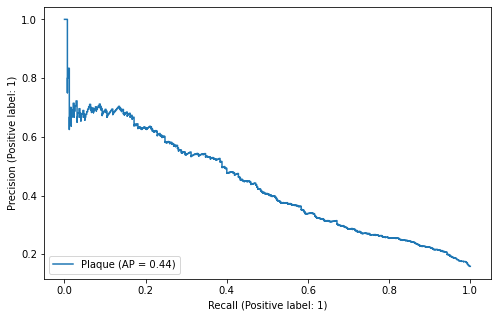

In [109]:
from sklearn.metrics import PrecisionRecallDisplay
fig, ax = plt.subplots(figsize=(8, 5))
PrecisionRecallDisplay.from_estimator(
    model, X_test, y_test, name="Plaque", pos_label=1, ax=ax)
plt.show()

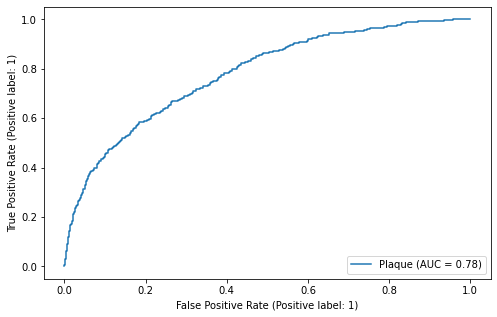

In [110]:
from sklearn.metrics import RocCurveDisplay
fig, ax = plt.subplots(figsize=(8, 5))
RocCurveDisplay.from_estimator(
    model, X_test, y_test, name="Plaque", pos_label=1, ax=ax)
plt.show()

In [112]:
# define grid of parameters

from sklearn.model_selection import GridSearchCV  

parameters = {'C': [0.1, 1, 10],     
              'max_iter' : [10, 100, 1000] 
}

#parameters to optimise
#n DE genes
# regularisation parameter, l1, l2, elastic net
# class imbalance parameter

array([[ 1.00226726e-01,  5.98960201e-02,  6.53738874e-02,
         3.04196738e-02, -3.03669740e-02, -1.21515699e-03,
        -1.88102586e-02,  5.25880038e-02,  3.39906861e-03,
         1.02555903e-02,  1.57213351e-02,  1.97449039e-02,
         9.35677361e-02,  4.28741921e-02, -1.36416844e-02,
         2.17640902e-02,  4.22420722e-02, -2.09016570e-02,
        -3.00357861e-02, -2.66424358e-03,  1.02424926e-02,
        -8.56510658e-02,  2.23944535e-02, -1.72596885e-03,
         1.23724074e-01,  5.57679705e-03, -1.34980219e-03,
         2.91458025e-04,  2.20105791e-03,  4.49784821e-02,
        -1.20537219e-02, -2.38890063e-02, -1.90471241e-02,
        -1.72017965e-02,  1.85595900e-02, -2.06793948e-03,
         2.66586100e-02,  3.81742935e-02, -2.16329155e-02,
         3.71322667e-02,  4.61644272e-02, -1.53603276e-02,
        -7.82232838e-03,  3.61853448e-02, -1.14540092e-03,
         2.60524708e-02,  7.79462118e-04, -1.06530128e-04,
        -3.67066734e-02, -2.57839395e-03]])

In [ ]:
# Do normal CV hyper-parameter tuning
# performance?

In [ ]:
# Do nested CV hyper-parameter tuning
# performance -> inspect best models

In [ ]:

# Learn about issues of logistic regression

In [170]:
#Random under sampling 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X_train, y_train)
print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_rus))

Original dataset shape: Counter({0: 11269, 1: 127})
Resample dataset shape Counter({0: 127, 1: 127})


In [185]:
#Fit model and predict
clf = LogisticRegression(max_iter=1000, penalty='l2').fit(x_rus, y_rus)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)
true = y_test
pf.report_metrics(true, pred, pred_prob)

TOTAL ACCURACY (#correct predictions/#total predictions) = 0.758 , 4257 of 5613
ACCURACY (#correct predictions/#total predictions) non-plaque = 0.757 , 4210 of 5562
ACCURACY (#correct predictions/#total predictions) plaque = 0.92 , 47 of 51
PRECISION (TP/TP+FP) non-plaque = 0.999
PRECISION (TP/TP+FP) plaque= 0.034
RECALL (TP/TP+FN) Non-plaque = 0.757
RECALL (TP/TP+FN) plaque = 0.922
F1 SCORE(2*(PR/P+R)) non-plaque = 0.861
F1 SCORE (2*(PR/P+R)) plaque = 0.065
TRUE POSITIVE RATE (TP/TP+FN) non-plaque = 0.757
TRUE POSITIVE RATE (TP/TP+FN) plaque = 0.922
FALSE POSITIVE RATE (FP/FP+TN) non-plaque  = 0.078
FALSE POSITIVE RATE (FP/FP+TN) plaque = 0.243
ROC AUC non-plaque = 0.914
ROC AUC plaque = 0.914


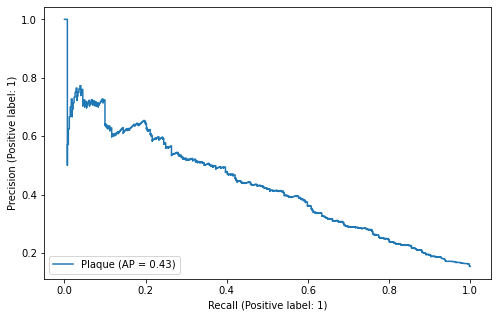

In [23]:
from sklearn.metrics import PrecisionRecallDisplay
fig, ax = plt.subplots(figsize=(8, 5))
PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="Plaque", pos_label=1, ax=ax)
plt.show()

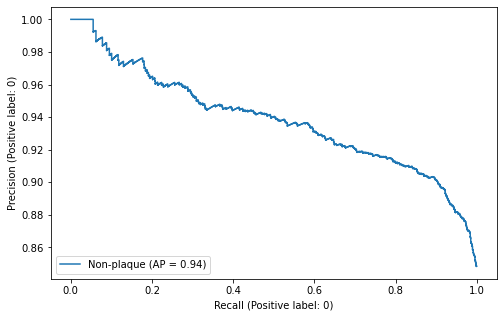

In [27]:
from sklearn.metrics import PrecisionRecallDisplay
fig, ax = plt.subplots(figsize=(8, 5))
PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="Non-plaque", pos_label=0, ax=ax)
plt.show()

In [28]:
fpr, tpr, thresholds = metrics.roc_curve(true, pred_prob[:,1], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
#set display size
plt.rcParams["figure.figsize"] = (8,5)
display.plot()
plt.show()

NameError: name 'metrics' is not defined

In [15]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(gene_all, lab, test_size=0.33)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11396, 32284), (5613, 32284), (11396,), (5613,))

In [226]:
# combine over and undersampling 
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

ros = SMOTE(sampling_strategy=0.05)# fit predictor and target variable
rus = RandomUnderSampler(replacement=False)# fit predictor and target variable
pipeline = Pipeline(steps=[('ros', ros), ('rus', rus)])
X_mix, y_mix = pipeline.fit_resample(X_train, y_train)
print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_mix))

#mix_pred = pipeline.predict(X_test)

Original dataset shape: Counter({0: 11271, 1: 125})
Resample dataset shape Counter({0: 563, 1: 563})


In [227]:
#Fit model and predict
clf = LogisticRegression(max_iter=1000, penalty='l2').fit(X_mix, y_mix)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)
true = y_test
pf.report_metrics(true, pred, pred_prob)

TOTAL ACCURACY (#correct predictions/#total predictions) = 0.93 , 5220 of 5613
ACCURACY (#correct predictions/#total predictions) non-plaque = 0.933 , 5187 of 5560
ACCURACY (#correct predictions/#total predictions) plaque = 0.62 , 33 of 53
PRECISION (TP/TP+FP) non-plaque = 0.996
PRECISION (TP/TP+FP) plaque= 0.081
RECALL (TP/TP+FN) Non-plaque = 0.933
RECALL (TP/TP+FN) plaque = 0.623
F1 SCORE(2*(PR/P+R)) non-plaque = 0.963
F1 SCORE (2*(PR/P+R)) plaque = 0.144
TRUE POSITIVE RATE (TP/TP+FN) non-plaque = 0.933
TRUE POSITIVE RATE (TP/TP+FN) plaque = 0.623
FALSE POSITIVE RATE (FP/FP+TN) non-plaque  = 0.377
FALSE POSITIVE RATE (FP/FP+TN) plaque = 0.067
ROC AUC non-plaque = 0.91
ROC AUC plaque = 0.91


In [224]:
#Fit model and predict
clf = LogisticRegression(max_iter=1000, penalty='l2').fit(X_mix, y_mix)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)
true = y_test
pf.report_metrics(true, pred, pred_prob)

TOTAL ACCURACY (#correct predictions/#total predictions) = 0.963 , 5405 of 5613
ACCURACY (#correct predictions/#total predictions) non-plaque = 0.969 , 5385 of 5560
ACCURACY (#correct predictions/#total predictions) plaque = 0.38 , 20 of 53
PRECISION (TP/TP+FP) non-plaque = 0.994
PRECISION (TP/TP+FP) plaque= 0.103
RECALL (TP/TP+FN) Non-plaque = 0.969
RECALL (TP/TP+FN) plaque = 0.377
F1 SCORE(2*(PR/P+R)) non-plaque = 0.981
F1 SCORE (2*(PR/P+R)) plaque = 0.161
TRUE POSITIVE RATE (TP/TP+FN) non-plaque = 0.969
TRUE POSITIVE RATE (TP/TP+FN) plaque = 0.377
FALSE POSITIVE RATE (FP/FP+TN) non-plaque  = 0.623
FALSE POSITIVE RATE (FP/FP+TN) plaque = 0.031
ROC AUC non-plaque = 0.912
ROC AUC plaque = 0.912


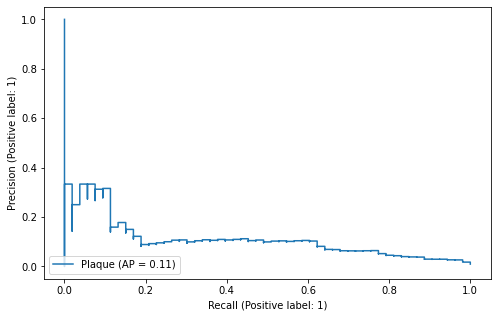

In [228]:
from sklearn.metrics import PrecisionRecallDisplay
fig, ax = plt.subplots(figsize=(8, 5))
PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="Plaque", pos_label=1, ax=ax)
plt.show()

In [ ]:

#Check top n DE genes -> 100? 
gene_all

In [ ]:
# Splitting -> cross validation -> tune some hyperparameters


In [ ]:
# Try out a different model? 

In [151]:
#Fit model and predict
clf = LogisticRegression(max_iter=1000, penalty='l2').fit(x_rus, y_rus)
pred = clf.predict(X_test)
true = y_test
report_class_acc(true, pred)

Non-plaque accuracy = 0.744 , 4127 of 5545
Plaque accuracy = 0.93 , 63 of 68


In [138]:
accuracy = sklearn.metrics.balanced_accuracy_score(true, pred)
accuracy

0.8353723545324352

In [51]:
#find the top n PCs of gene data
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(gene_all)
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

8


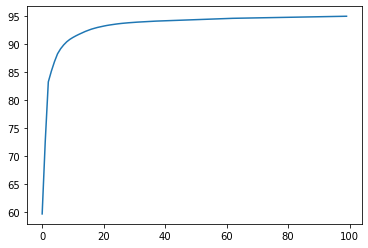

In [52]:
minpc = np.where(var1 > 90)[0][0]
print(minpc)
plt.plot(var1)
plt.show()

In [29]:
lab.shape, gene_all.shape

((17009,), (17009, 32284))

In [110]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
X_sc = scaler.fit_transform(gene_all)

#find the top n PCs of gene data
pca = PCA(n_components=8)
pca.fit(X_sc)
X_pc = pca.transform(X_sc)


In [111]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_pc, lab, test_size=0.33, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((11396, 8), (11396,), (5613, 8), (5613,))

In [112]:
#Random under sampling
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X_train, y_train)
print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_rus))

Original dataset shape: Counter({0: 11273, 1: 123})
Resample dataset shape Counter({0: 123, 1: 123})


In [114]:
#Fit model and predict
clf = LogisticRegression(max_iter=1000, penalty='l2').fit(x_rus, y_rus)
pred = clf.predict(X_test)
true = y_test
report_class_acc(true, pred)

Non-plaque accuracy = 0.706 , 3923 of 5558
Plaque accuracy = 0.87 , 48 of 55


In [67]:
sum(true[np.where(true==1)] == pred[np.where(true==1)]) 

3

In [41]:
np.unique(true)

array([0, 1])

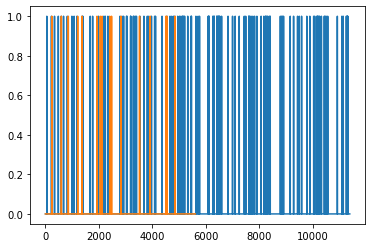

In [49]:
plt.plot(y_train)
plt.plot(pred)